In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importing Dataset

df = pd.read_excel('1673872777_ausapparalsales4thqrt2020.xlsx')

In [ ]:
1. Data Wrangling

In [64]:
df.head()

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7560 non-null   datetime64[ns]
 1   Time    7560 non-null   object        
 2   State   7560 non-null   object        
 3   Group   7560 non-null   object        
 4   Unit    7560 non-null   int64         
 5   Sales   7560 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 354.5+ KB


In [7]:
df.shape

(7560, 6)

In [9]:
# 1.1 Missing Values

# Check for missing values
missing_values = df.isna().sum()

# Check for non-missing values
non_missing_values = df.notna().sum()

# Display the results
print("Missing Values:")
print(missing_values)

Missing Values:
Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64


In [ ]:
Since there no missing values, no need to treat or modify it any further.

In [12]:
# Checking for Duplicates

# Check for duplicates
duplicates = df[df.duplicated()]

# Display the duplicates (if any)
print("Duplicate Rows:")
print(duplicates)

Duplicate Rows:
Empty DataFrame
Columns: [Date, Time, State, Group, Unit, Sales]
Index: []


In [16]:
# 1.3 Normalizing the data

from sklearn.preprocessing import MinMaxScaler

# Assuming 'df' is your DataFrame
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
df[numeric_columns]

,Unit,Sales
0,0.095238,0.095238
1,0.095238,0.095238
2,0.031746,0.031746
3,0.206349,0.206349
4,0.015873,0.015873
...,...,...
7555,0.190476,0.190476
7556,0.206349,0.206349
7557,0.206349,0.206349
7558,0.142857,0.142857


In [15]:
# 1.4 Share your recommendation on the usage of the groupby() function for data chunking or merging.
# Group by 'State' and calculate the sum of 'Sales'
state_sales_group = df.groupby('State')['Sales'].sum()

# Group by 'Group' and calculate the sum of 'Sales'
group_sales_group = df.groupby('Group')['Sales'].sum()

# Display the results
print("Group by State and Sales:")
print(state_sales_group)

print("\nGroup by Group and Sales:")
print(group_sales_group)

Group by State and Sales:
State
 NSW    441.714286
 NT     109.079365
 QLD    177.888889
 SA     339.412698
 TAS    110.222222
 VIC    635.968254
 WA     106.365079
Name: Sales, dtype: float64

Group by Group and Sales:
Group
 Kids       480.142857
 Men        484.444444
 Seniors    473.571429
 Women      482.492063
Name: Sales, dtype: float64


In [ ]:
2. Data Analysis

In [4]:
# 2.1 Perform descriptive statistical analysis on the data (Sales and Unit columns)

# Descriptive statistics for 'Sales' and 'Unit' columns
sales_unit_stats = df[['Sales', 'Unit']].describe()

# Display the results
print("Descriptive Statistics for Sales and Unit:")
print(sales_unit_stats)

Descriptive Statistics for Sales and Unit:
               Sales         Unit
count    7560.000000  7560.000000
mean    45013.558201    18.005423
std     32253.506944    12.901403
min      5000.000000     2.000000
25%     20000.000000     8.000000
50%     35000.000000    14.000000
75%     65000.000000    26.000000
max    162500.000000    65.000000


In [9]:
# Mode for 'Sales' and 'Unit' columns
sales_mode = df['Sales'].mode()
unit_mode = df['Unit'].mode()

# Display the mode
print("\nMode for Sales:")
print(sales_mode)

print("\nMode for Unit:")
print(unit_mode)


Mode for Sales:
0    22500
Name: Sales, dtype: int64

Mode for Unit:
0    9
Name: Unit, dtype: int64


In [20]:
# 2.2 Determine which group is generating the highest sales, and which group is generating the lowest sales.

# Group by 'Group' and calculate the sum of 'Sales'
group_sales = df.groupby('Group')['Sales'].sum()

# Find the group with the highest sales
highest_sales_group = group_sales.idxmax()
highest_sales_value = group_sales.max()

# Find the group with the lowest sales
lowest_sales_group = group_sales.idxmin()
lowest_sales_value = group_sales.min()

# Display the results
print("Group with the Highest Sales:")
print("Group:", highest_sales_group)
print("Sales:", highest_sales_value)

print("\nGroup with the Lowest Sales:")
print("Group:", lowest_sales_group)
print("Sales:", lowest_sales_value)

Group with the Highest Sales:
Group:  Men
Sales: 484.44444444444446

Group with the Lowest Sales:
Group:  Seniors
Sales: 473.57142857142856


# 'Men' group has the highest total sales, while the 'Seniors' group has the lowest total sales.

In [21]:
# 2.3 Determine which state is generating the highest sales, and which state is generating the lowest sales.

# Group by 'State' and calculate the sum of 'Sales'
state_sales = df.groupby('State')['Sales'].sum()

# Find the state with the highest sales
highest_sales_state = state_sales.idxmax()
highest_sales_value = state_sales.max()

# Find the state with the lowest sales
lowest_sales_state = state_sales.idxmin()
lowest_sales_value = state_sales.min()

# Display the results
print("State with the Highest Sales:")
print("State:", highest_sales_state)
print("Sales:", highest_sales_value)

print("\nState with the Lowest Sales:")
print("State:", lowest_sales_state)
print("Sales:", lowest_sales_value)

State with the Highest Sales:
State:  VIC
Sales: 635.968253968254

State with the Lowest Sales:
State:  WA
Sales: 106.36507936507937


In [26]:
# 2.4 Generate weekly, monthly and quarterly reports for the analysis made.

datetime_column_name = 'Date'

# Check if the datetime column exists in the DataFrame
if datetime_column_name in df.columns:
    df[datetime_column_name] = pd.to_datetime(df[datetime_column_name])
    df.set_index(datetime_column_name, inplace=True)

    # Weekly Report
    weekly_report = df[['Sales', 'Unit']].resample('W').sum()

    # Monthly Report
    monthly_report = df[['Sales', 'Unit']].resample('M').sum()

    # Quarterly Report
    quarterly_report = df[['Sales', 'Unit']].resample('Q').sum()

    # Display the reports
    print("Weekly Report:")
    print(weekly_report)

    print("\nMonthly Report:")
    print(monthly_report)

    print("\nQuarterly Report:")
    print(quarterly_report)
else:
    # Use the existing index for the reports
    df.index = pd.to_datetime(df.index)

    # Weekly Report
    weekly_report = df[['Sales', 'Unit']].resample('W').sum()

    # Monthly Report
    monthly_report = df[['Sales', 'Unit']].resample('M').sum()

    # Quarterly Report
    quarterly_report = df[['Sales', 'Unit']].resample('Q').sum()

    # Display the reports
    print("Weekly Report:")
    print(weekly_report)

    print("\nMonthly Report:")
    print(monthly_report)

    print("\nQuarterly Report:")
    print(quarterly_report)

Weekly Report:
                 Sales        Unit
Date                              
2020-10-04   84.857143   84.857143
2020-10-11  152.777778  152.777778
2020-10-18  150.476190  150.476190
2020-10-25  151.587302  151.587302
2020-11-01  122.460317  122.460317
2020-11-08  113.809524  113.809524
2020-11-15  115.761905  115.761905
2020-11-22  115.380952  115.380952
2020-11-29  117.698413  117.698413
2020-12-06  169.412698  169.412698
2020-12-13  181.492063  181.492063
2020-12-20  182.317460  182.317460
2020-12-27  183.047619  183.047619
2021-01-03   79.571429   79.571429

Monthly Report:
                 Sales        Unit
Date                              
2020-10-31  645.650794  645.650794
2020-11-30  495.761905  495.761905
2020-12-31  779.238095  779.238095

Quarterly Report:
                  Sales         Unit
Date                                
2020-12-31  1920.650794  1920.650794


In [ ]:
3. Data Visualization

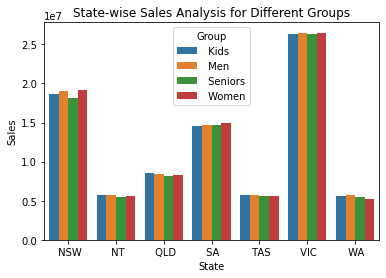

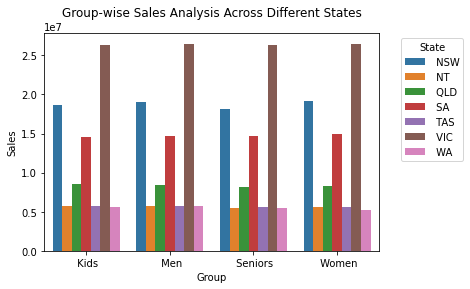

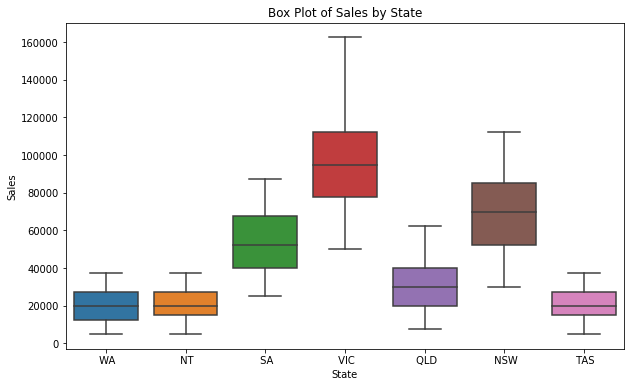

In [6]:
# 3.1 State-wise sales analysis for different groups (kids, women, men, and seniors) 
# 3.2 Group-wise sales analysis (kids, women, men, and seniors) across different states.

import plotly.express as px

df.reset_index(inplace=True)

# Check if 'Date' is in the column names
date_column_name = 'Date'
if date_column_name in df.columns:
    # Ensure 'Date' is in datetime format
    df[date_column_name] = pd.to_datetime(df[date_column_name])

    # State-wise sales analysis for different groups
    state_group_sales = df.groupby(['State', 'Group'])['Sales'].sum().reset_index()
    sns.barplot(x='State', y='Sales', hue='Group', data=state_group_sales)
    plt.title('State-wise Sales Analysis for Different Groups')
    plt.show()

    # Group-wise sales analysis across different states
    group_state_sales = df.groupby(['Group', 'State'])['Sales'].sum().reset_index()
    sns.barplot(x='Group', y='Sales', hue='State', hue_order=group_state_sales['State'].unique(), data=group_state_sales)
    plt.title('Group-wise Sales Analysis Across Different States')
    plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend outside the plot
    plt.show()
else:
    print(f"The '{date_column_name}' column is not present in the DataFrame.")
    
    # Box Plot for Sales
plt.figure(figsize=(10, 6))
sns.boxplot(x='State', y='Sales', data=df)
plt.title('Box Plot of Sales by State')
plt.xlabel('State')
plt.ylabel('Sales')
plt.show()

# Analysis:
The State of Victoria has the most sales and subsequently generating highest revenue.
The State of Western Australia has lowest sales and revenue along with Northern Territory and Tasmania very close 2nd and 3rd.

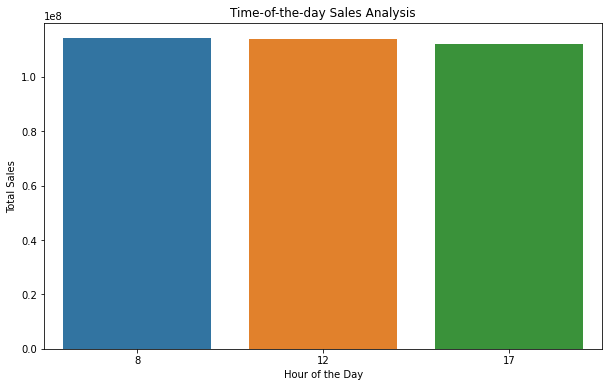

In [ ]:
# 3.3 Time-of-the-day analysis

# Clean up the 'Time' column by removing leading and trailing spaces
df['Time'] = df['Time'].str.strip()

# Create a mapping for the time values
time_mapping = {'Morning': 8, 'Afternoon': 12, 'Evening': 17, 'Night': 20}

# Map the 'Time' values to numeric values
df['Hour'] = df['Time'].map(time_mapping)

# Group by 'Hour' and calculate total sales for each time period
time_sales_grouped = df.groupby('Hour')['Sales'].sum().reset_index()

# Plot the bar chart for time-of-the-day sales analysis
plt.figure(figsize=(10, 6))
sns.barplot(x='Hour', y='Sales', data=time_sales_grouped)
plt.title('Time-of-the-day Sales Analysis')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales')
plt.show()

The Sales does not get impacted due to timing of the day, Customers buy from morning to evening evenly.
Although Morning hours have slightly more sales than Afternoon and Evening. 

/tmp/ipykernel_168/481676115.py:24: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/tmp/ipykernel_168/481676115.py:31: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



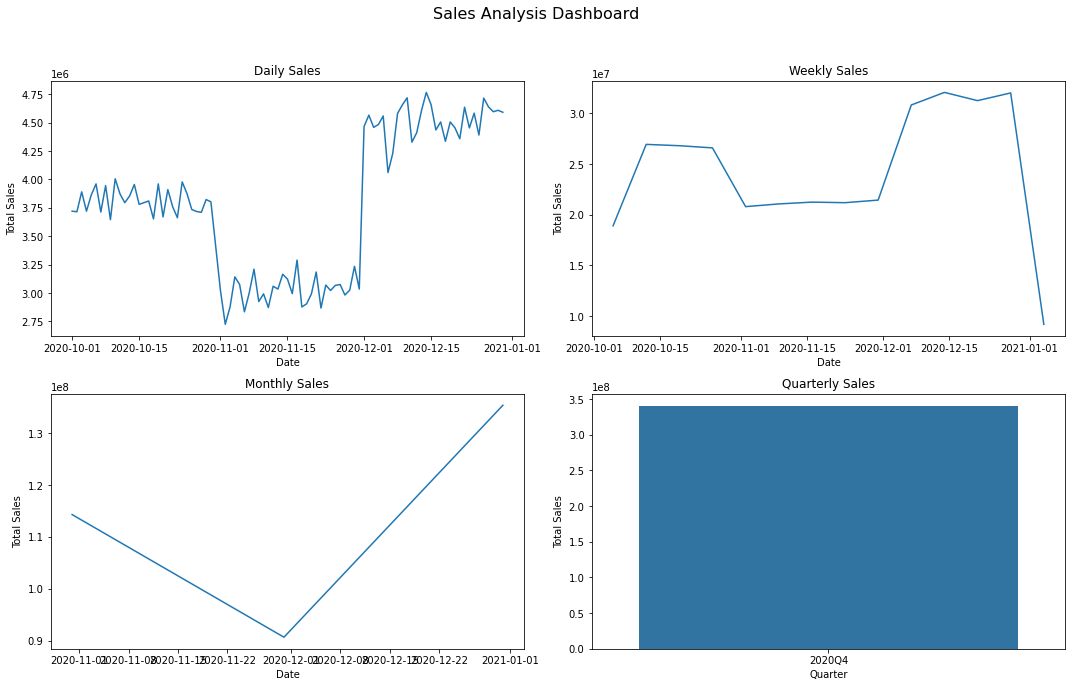

In [86]:
# 3.4 The dashboard must contain daily, weekly, monthly and quarterly charts.

# Reload the DataFrame
df = pd.read_excel('1673872777_ausapparalsales4thqrt2020.xlsx')

# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create a new column for the quarter
df['Quarter'] = df['Date'].dt.to_period("Q")

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.suptitle('Sales Analysis Dashboard', fontsize=16)

# Daily Sales
daily_sales = df.groupby('Date')['Sales'].sum().reset_index()
sns.lineplot(x='Date', y='Sales', data=daily_sales, ax=axes[0, 0])
axes[0, 0].set_title('Daily Sales')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Total Sales')

# Weekly Sales
weekly_sales = df.resample('W-Mon', on='Date').sum().reset_index()
sns.lineplot(x='Date', y='Sales', data=weekly_sales, ax=axes[0, 1])
axes[0, 1].set_title('Weekly Sales')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Total Sales')

# Monthly Sales
monthly_sales = df.resample('M', on='Date').sum().reset_index()
sns.lineplot(x='Date', y='Sales', data=monthly_sales, ax=axes[1, 0])
axes[1, 0].set_title('Monthly Sales')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Total Sales')

# Quarterly Sales
quarterly_sales = df.groupby('Quarter')['Sales'].sum().reset_index()
quarterly_sales['Quarter'] = quarterly_sales['Quarter'].astype(str)
quarterly_sales = quarterly_sales.sort_values(by='Quarter')
sns.barplot(x='Quarter', y='Sales', data=quarterly_sales, ax=axes[1, 1])
axes[1, 1].set_title('Quarterly Sales')
axes[1, 1].set_xlabel('Quarter')
axes[1, 1].set_ylabel('Total Sales')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 3.6 Include your recommendation, and indicate why you are choosing the recommended visualization package.
The choice of visualization library depends on the specific requirements and preferences. 
Seaborn is chosen here for its ease of use and clear presentation of statistical relationships. 
Plotly is recommended for interactive charts, enabling the user to explore the data further.

# formulating sales programs for states with lower revenues: 
Data Analysis:
Conduct a thorough analysis of the states with lower revenues. Identify specific regions, demographics, 
and product categories that contribute less to sales.

Identify Target Markets:
Identify potential target markets within those states. Look for untapped customer segments, emerging trends,
or niche markets that could be leveraged.

Competitor Analysis:
Analyze competitors in those states. Understand their strategies, strengths, and weaknesses. 
Identify opportunities to differentiate your products or services.

Collaborate with Local Businesses:
Form partnerships with local businesses in the targeted states. Collaborate on promotions, cross-selling, or joint events.
This can help expand your reach and build local relationships.

Customized Marketing Strategies:
Develop customized marketing strategies for states with lower revenues. Consider regional preferences, cultural differences, 
and economic factors. Create targeted advertising campaigns.